In [1]:
import pandas as pd

covid_file = "Folkhalsomyndigheten_Covid19.xlsx"

veckodata_riket_df = pd.read_excel(covid_file, sheet_name = "Veckodata Riket")

In [2]:
veckodata_riket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [3]:
veckodata_riket_df.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [4]:
veckodata_riket_df[veckodata_riket_df.isna().any(axis = 1)]

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv


In [5]:
veckodata_riket_df[veckodata_riket_df.isnull().any(axis = 1)]

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv


In [2]:
# converting columns år and veckonummer with astype() before concatenating
veckodata_riket_df["Vecka"] = veckodata_riket_df["år"].astype(str) + "v" + veckodata_riket_df["veckonummer"].astype(str)

veckodata_riket_df["Vecka"]

0      2020v6
1      2020v7
2      2020v8
3      2020v9
4     2020v10
       ...   
84    2021v37
85    2021v38
86    2021v39
87    2021v40
88    2021v41
Name: Vecka, Length: 89, dtype: object

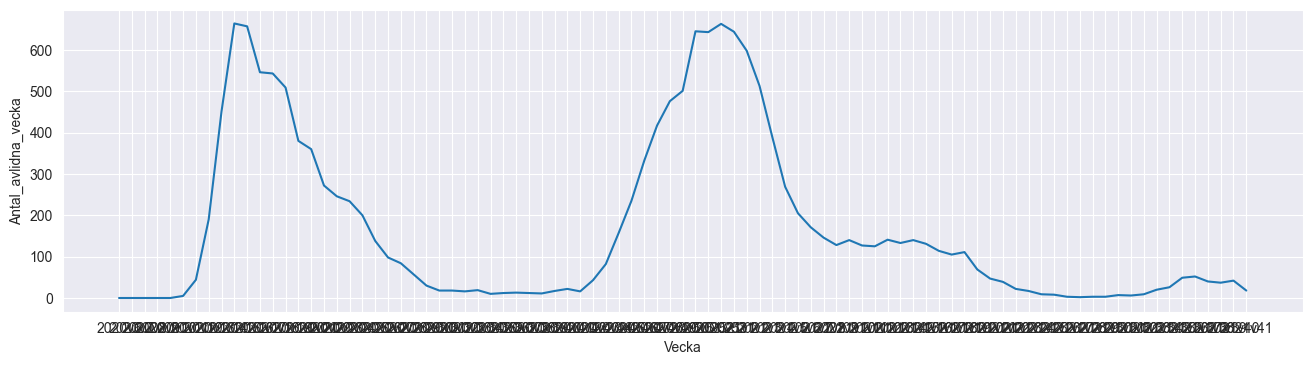

In [10]:
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

#c)
fig, ax = plt.subplots(1, 1, figsize = (16, 4), dpi = 100)

sns.lineplot(data = veckodata_riket_df, x = "Vecka", y = "Antal_avlidna_vecka")
#sns.set_style("darkgrid")
#ax.set(xlabel = "Vecka", ylabel = "Avlidna")
#ax.set_xticks(veckodata_riket_df["Vecka"]) # Just to avoid the UserWarning: FixedFormatter should only be used together with FixedLocator
#ax.set_xticklabels(veckodata_riket_df["Vecka"], rotation = 90)
#ax.set_title("Antal avlidna per vecka")
plt.savefig("../Visualiseringar/antal_avlidna_per_vecka.png", bbox_inches = "tight")

In [91]:
fig = px.line(
    veckodata_riket_df, 
    x = "Vecka", 
    y = "Antal_avlidna_vecka",
    labels = {"Vecka": "Vecka", "Antal_avlidna_vecka": "Antal avlidna"},
    title = "Antal avlidna per vecka"
)

fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode = "x")

fig.write_html("../Visualiseringar/antal_avlinda_per_vecka.html")

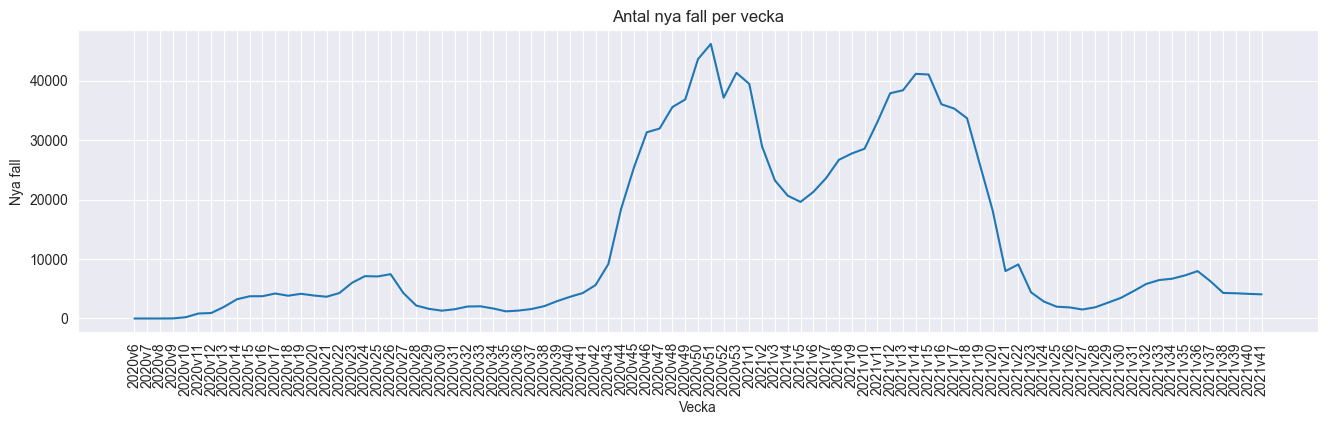

In [8]:
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

#c)
fig, ax = plt.subplots(1, 1, figsize = (16, 4), dpi = 100)

sns.lineplot(data = veckodata_riket_df, x = "Vecka", y = "Antal_fall_vecka")
sns.set_style("darkgrid")
ax.set(xlabel = "Vecka", ylabel = "Nya fall")
ax.set_xticks(veckodata_riket_df["Vecka"]) # Just to avoid the UserWarning: FixedFormatter should only be used together with FixedLocator
ax.set_xticklabels(veckodata_riket_df["Vecka"], rotation = 90)
ax.set_title("Antal nya fall per vecka")
plt.savefig("../Visualiseringar/antal_nya_fall_per_vecka.png", bbox_inches = "tight")

In [93]:
fig = px.line(
    veckodata_riket_df, 
    x = "Vecka", 
    y = "Antal_fall_vecka",
    labels = {"Vecka": "Vecka", "Antal_fall_vecka": "Antal nya fall"},
    title = "Antal nya fall per vecka"
    )

fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode = "x")

fig.write_html("../Visualiseringar/antal_nya_fall_per_vecka.html")

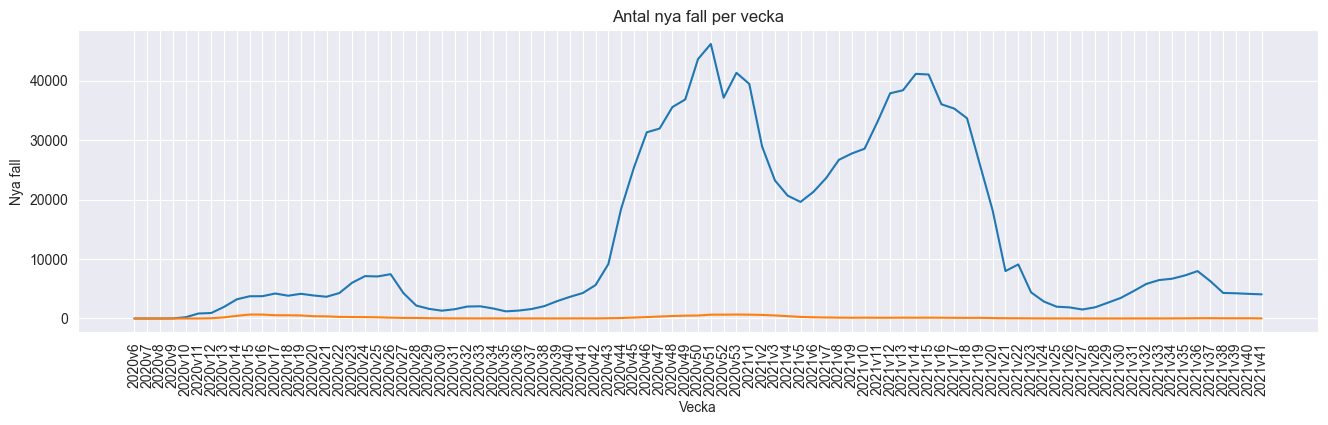

In [104]:
fig, ax = plt.subplots(1, 1, figsize = (16, 4), dpi = 100)

sns.lineplot(data = veckodata_riket_df, x = "Vecka", y = "Antal_fall_vecka")
sns.lineplot(data = veckodata_riket_df, x = "Vecka", y = "Antal_avlidna_vecka")
sns.set_style("darkgrid")
ax.set(xlabel = "Vecka", ylabel = "Nya fall")
ax.set_xticks(veckodata_riket_df["Vecka"]) # Just to avoid the UserWarning: FixedFormatter should only be used together with FixedLocator
ax.set_xticklabels(veckodata_riket_df["Vecka"], rotation = 90)
ax.set_title("Antal nya fall per vecka")
plt.savefig("../Visualiseringar/antal_nya_fall_avlidna_per_vecka.png", bbox_inches = "tight")

In [101]:
fig = px.line(
    veckodata_riket_df, 
    x = "Vecka", 
    y = ["Antal_fall_vecka", "Antal_avlidna_vecka"],
    labels = {"Vecka": "Vecka", "Antal_fall_vecka": "Antal nya fall"},
    title = "Antal nya fall och döda per vecka"
    )

fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode = "x")

fig.write_html("../Visualiseringar/antal_nya_fall_avlidna_per_vecka.html")

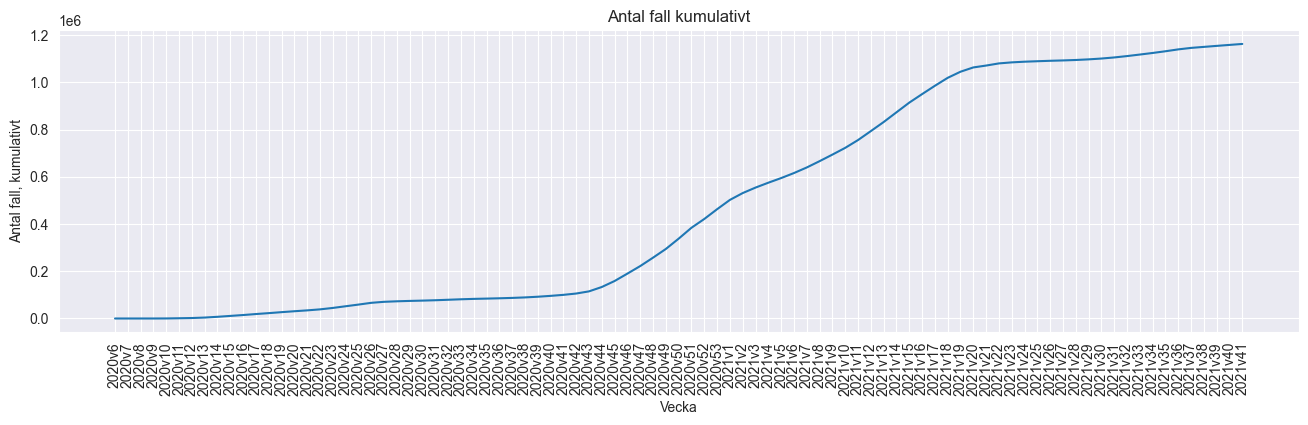

In [105]:
fig, ax = plt.subplots(1, 1, figsize = (16, 4), dpi = 100)

sns.lineplot(data = veckodata_riket_df, x = "Vecka", y = "Kum_antal_fall")
sns.set_style("darkgrid")
ax.set(xlabel = "Vecka", ylabel = "Antal fall, kumulativt")
ax.set_xticks(veckodata_riket_df["Vecka"]) # Just to avoid the UserWarning: FixedFormatter should only be used together with FixedLocator
ax.set_xticklabels(veckodata_riket_df["Vecka"], rotation = 90)
ax.set_title("Antal fall kumulativt")
plt.savefig("../Visualiseringar/antal_fall_kumulativt.png", bbox_inches = "tight")

In [106]:
fig = px.line(
    veckodata_riket_df, 
    x = "Vecka", 
    y = ["Kum_antal_fall"],
    labels = {"Vecka": "Vecka", "Antal_fall_vecka": "Antal fall"},
    title = "Antal fall kumulativt"
    )

fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode = "x")

fig.write_html("../Visualiseringar/antal_fall_kumulativt.html")